##**1. Data Preprocessing**

In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Summary of the dataset
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


Explanation:
Loading CIFAR-10 dataset: CIFAR-10 contains 60,000 32x32 images across 10 classes.

Normalization: Pixel values are divided by 255 to scale them between 0 and 1, which speeds up convergence and helps the neural network learn faster.

One-hot encoding: The labels (0-9) are converted into a one-hot encoded format since this is a multi-class classification problem.

##**2. Network Architecture Design**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Create the feedforward neural network
model = Sequential()

# Input Layer + Hidden Layers
model.add(Flatten(input_shape=(32, 32, 3)))  # Flatten input image of shape 32x32x3 to 1D array
model.add(Dense(units=512, activation='relu'))  # Hidden layer 1 with 512 neurons
model.add(Dense(units=256, activation='relu'))  # Hidden layer 2 with 256 neurons

# Output Layer
model.add(Dense(units=10, activation='softmax'))  # 10 output neurons for 10 classes with softmax

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

**Question: Justify your choice of network architecture.**

Answer:
Input Layer: 32x32x3 dimensions match CIFAR-10 images.

Hidden Layers: Two Dense layers (512 and 256 neurons) with ReLU for non-linearity and efficient training.

Output Layer: 10 neurons with softmax for multi-class classification.

Two hidden layers offer enough complexity without overfitting, and Dense layers map features to classes.

##**3. Activation Functions**

In [3]:
# Model with Sigmoid activation function in the hidden layers
model_sigmoid = Sequential()
model_sigmoid.add(Flatten(input_shape=(32, 32, 3)))
model_sigmoid.add(Dense(units=512, activation='sigmoid'))  # Sigmoid activation
model_sigmoid.add(Dense(units=256, activation='sigmoid'))
model_sigmoid.add(Dense(units=10, activation='softmax'))
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model with ReLU (as earlier created)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Question: Why choose particular activation functions?**

Answer:
ReLU: Efficient, avoids vanishing gradients, and accelerates learning.
Sigmoid/Tanh (for comparison): Slower convergence, potential vanishing gradient but useful to compare.


ReLU is preferred for faster, stable training.

##**4. Loss Function and Optimizer**

In [4]:
# Using Mean Squared Error (MSE) as an alternative loss function
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Using Adam optimizer with a reduced learning rate
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


Categorical Crossentropy: This is the most suitable loss function for multi-class classification problems, especially when dealing with softmax outputs.

Mean Squared Error: Typically used in regression but can be compared to crossentropy to see the effect.

Optimizer (Adam): Adam combines the best properties of RMSProp and Stochastic Gradient Descent. We adjust the learning rate to ensure smooth convergence.

**Question: How does the choice of optimizer and learning rate influence convergence?**

Answer:
Adam Optimizer: Adapts learning rates, leading to faster and more stable convergence.

Learning Rate: Controls step size; high can cause overshooting, low can slow down training.

Adjustment: If convergence is slow, reduce the learning rate; if oscillating, lower it further.

##**5. Training the Model**

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - accuracy: 0.2732 - loss: 2.0538 - val_accuracy: 0.3636 - val_loss: 1.7625
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.3921 - loss: 1.6943 - val_accuracy: 0.4238 - val_loss: 1.6070
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 28ms/step - accuracy: 0.4323 - loss: 1.5914 - val_accuracy: 0.4532 - val_loss: 1.5328
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4524 - loss: 1.5320 - val_accuracy: 0.4427 - val_loss: 1.5661
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.4661 - loss: 1.4992 - val_accuracy: 0.4632 - val_loss: 1.4997
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4774 - loss: 1.4689 - val_accuracy: 0.4545 - val_loss: 1.5177
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.4912 - loss: 1.4260 - val_accuracy: 0.4622 - val_loss: 1.5067
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.4997 - loss: 1.4007 - 

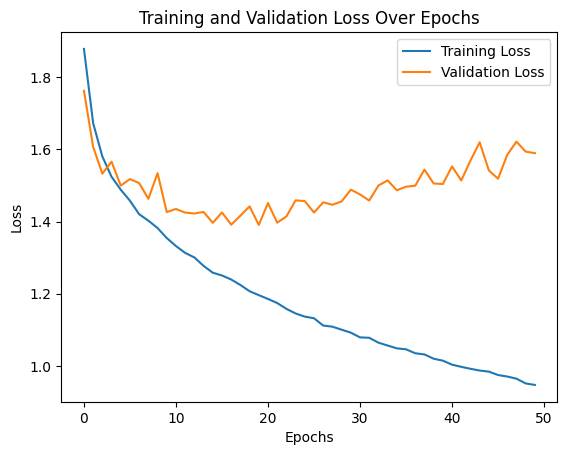

In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Plot the training loss and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Question: How does backpropagation update the weights, and what role does the learning rate play?**

Answer:
Backpropagation adjusts weights by calculating gradients and using the formula:
W_new = W_old - learning_rate * gradient.

The learning rate determines the size of these updates, affecting the speed and stability of training.

Training the model: The model is trained for 50 epochs with a batch size of 64. Validation accuracy and loss are monitored to detect overfitting.

Backpropagation: During each iteration, backpropagation updates the weights using gradient descent to minimize the loss function. The learning rate controls how large the steps are during this update.





##**6. Model Evaluation**

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Predictions and metrics
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print('Confusion Matrix:\n', conf_matrix)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5051 - loss: 1.5952
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1000
           1       0.62      0.62      0.62      1000
           2       0.38      0.39      0.38      1000
           3       0.38      0.27      0.31      1000
           4       0.38      0.55      0.45      1000
           5       0.46      0.34      0.39      1000
           6       0.51      0.59      0.55      1000
           7       0.61      0.49      0.55      1000
           8       0.55      0.72      0.63      1000
           9       0.57      0.50      0.53      1000

    accuracy                           0.50     10000
   macro avg       0.51      0.50      0.50     10000
weighted avg       0.51      0.50      0.50     10000

Confusion Matrix:
 [[559  30  72  11  60  11  21  15 183  38]
 [ 40 622  27  11  20  14  16  16 108 126]
 [ 62  22 387  58 22

**Question: How can you improve model performance if accuracy is low?**

Answer:
Increase model complexity (more layers/neurons).

Apply data augmentation or regularization (dropout, L2).


Tune optimizer, learning rate, or train for more epochs.

##**7. Optimization Strategies**

In [8]:
# Implementing Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.6693 - loss: 0.9202 - val_accuracy: 0.5007 - val_loss: 1.6083
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.6713 - loss: 0.9194 - val_accuracy: 0.5162 - val_loss: 1.5983
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.6741 - loss: 0.9021 - val_accuracy: 0.4982 - val_loss: 1.6660
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6693 - loss: 0.9141 - val_accuracy: 0.4983 - val_loss: 1.6373
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6720 - loss: 0.9037 - val_accuracy: 0.5166 - val_loss: 1.5881
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6746 - loss: 0.9051 - val_accuracy: 0.4958 - val_loss: 1.6844
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6824 - loss: 0.8905 - val_accuracy: 0.5032 - val_loss: 1.6324
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.6801 - loss: 0.8939 - 

**Question: Why is weight initialization important?**

Answer:
Proper weight initialization (e.g., He, Xavier) prevents vanishing/exploding gradients and helps efficient learning. Bad initialization leads to slow or unstable convergence.